Example: using Pandas to explore Kepler data
------------

The Kepler probe observed a patch of sky for four years looking for transit signals, evidence of planets slightly dimming these stars by passing between us and the star on their orbit.

The following example fetches the KOI (Kepler Object of Interest) table. Each row is a star that showed periodic dimming consistent with a planet in orbit around the star. However, we expect that there are a lot of false positives, so not every row corresponds to a real planet.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
koi = pd.read_csv('http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative')
#koi = pd.read_excel('planets.xls')

In [3]:
koi.describe()

/panfs/roc/itascasoft/python3/3.4-conda/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,koi_kepmag_err
count,8.826000e+03,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8469.000000,8469.000000,8826.000000,8469.000000,...,8365.000000,8348.000000,8469.000000,8365.000000,8365.000000,8469.000000,8365.000000,8365.000000,8825.000000,0.0
mean,7.674322e+06,0.128031,0.232608,0.159642,0.116021,70.246533,0.001681,-0.001681,163.412837,0.008642,...,161.647340,-175.009943,4.357337,0.103436,-0.223424,1.478861,0.529950,-0.306424,14.270719,NaN
std,2.656082e+06,0.334143,0.422518,0.366294,0.320268,1388.387352,0.007288,0.007288,63.485722,0.020739,...,42.840349,58.198798,0.385982,0.113674,0.137666,4.044114,1.011488,1.098012,1.384703,NaN
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000006,...,0.000000,-1473.000000,0.146000,0.000000,-1.207000,0.109000,0.000000,-34.637000,6.966000,NaN
25%,5.531759e+06,0.000000,0.000000,0.000000,0.000000,2.834688,NaN,NaN,132.837453,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.888376e+06,0.000000,0.000000,0.000000,0.000000,9.477663,NaN,NaN,137.127774,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.850729e+06,0.000000,0.000000,0.000000,0.000000,35.483740,NaN,NaN,170.044769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522007,0.579000,...,1067.000000,0.000000,5.364000,1.184000,0.000000,149.058000,33.474000,0.000000,20.003000,NaN


In [4]:
koi.kepid

0       10797460
1       10797460
2       10811496
3       10848459
4       10854555
5       10872983
6       10872983
7       10872983
8        6721123
9       10910878
10      11446443
11      10666592
12       6922244
13      10984090
14      10419211
15      10464078
16      10480982
17      10485250
18      10526549
19      10583066
20      10583180
21      10601284
22      10601284
23      10601284
24       2306756
25      10662202
26      10682541
27      11460018
28      11463211
29      11465813
          ...   
8796     7186259
8797     7214090
8798     7281694
8799     7362450
8800     8007262
8801     8096395
8802     8106973
8803     8168509
8804    10397751
8805     8258103
8806     8297319
8807     8423344
8808     8444868
8809     8579684
8810     8649876
8811     8682094
8812     8846809
8813     8868686
8814     9025662
8815     8572936
8816     9837578
8817     7821010
8818     5473556
8819     6504534
8820     6307062
8821     5652983
8822     9092897
8823     92467

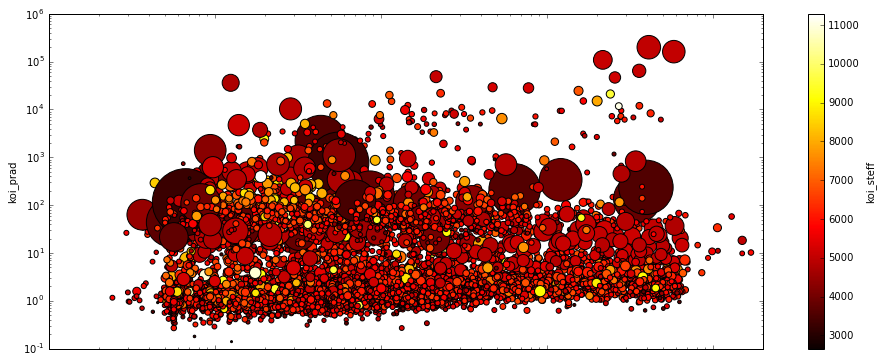

In [5]:
ax = koi.plot(x='koi_period', y='koi_prad', c='koi_steff', s=koi['koi_srad']*30, colormap=plt.cm.hot, kind='scatter', 
              figsize=(16,6), xlim=(0.1,2000), loglog=True)

In [6]:
koi['koi_steff'].describe()

/panfs/roc/itascasoft/python3/3.4-conda/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     8469.00000
mean      5745.46558
std        799.93481
min       2661.00000
25%              NaN
50%              NaN
75%              NaN
max      11287.00000
Name: koi_steff, dtype: float64

In [7]:
koi['koi_srad'].describe()

/panfs/roc/itascasoft/python3/3.4-conda/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    8469.000000
mean        1.478861
std         4.044114
min         0.109000
25%              NaN
50%              NaN
75%              NaN
max       149.058000
Name: koi_srad, dtype: float64

In [8]:
koi.index = koi['kepid']

In [9]:
koi.iloc[42]

kepid                       11304958
kepoi_name                 K00764.01
kepler_name             Kepler-667 b
koi_disposition            CONFIRMED
koi_pdisposition           CANDIDATE
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   41.4396
koi_period_err1            8.183e-05
koi_period_err2           -8.183e-05
koi_time0bk                  208.931
koi_time0bk_err1             0.00161
koi_time0bk_err2            -0.00161
koi_impact                    0.3872
koi_impact_err1                0.087
koi_impact_err2              -0.3149
koi_duration                 10.6468
koi_duration_err1             0.0961
koi_duration_err2            -0.0961
koi_depth                     3010.1
koi_depth_err1                  26.3
koi_depth_err2                 -26.3
koi_prad                        5.73
koi_prad_err1                   2.06
koi_prad_err2                  -0.86
k

In [10]:
koi.loc[5358241]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
5358241,5358241,K00829.01,Kepler-53 b,CONFIRMED,CANDIDATE,0,0,0,0,18.649297,...,4.495,0.045,-0.284,0.945,0.364,-0.088,19h21m50.82s,+40d33m44.9s,15.386,NaN
5358241,5358241,K00829.02,Kepler-53 d,CONFIRMED,CANDIDATE,0,0,0,0,9.751932,...,4.495,0.045,-0.284,0.945,0.364,-0.088,19h21m50.82s,+40d33m44.9s,15.386,NaN
5358241,5358241,K00829.03,Kepler-53 c,CONFIRMED,CANDIDATE,0,0,0,0,38.557591,...,4.495,0.045,-0.284,0.945,0.364,-0.088,19h21m50.82s,+40d33m44.9s,15.386,NaN


In [11]:
koi.kepler_name.isnull()

kepid
10797460    False
10797460    False
10811496     True
10848459     True
10854555    False
10872983    False
10872983    False
10872983    False
6721123      True
10910878    False
11446443    False
10666592    False
6922244     False
10984090    False
10419211     True
10464078     True
10480982     True
10485250     True
10526549    False
10583066    False
10583180     True
10601284    False
10601284    False
10601284    False
2306756      True
10662202    False
10682541    False
11460018    False
11463211     True
11465813     True
            ...  
7186259      True
7214090      True
7281694      True
7362450      True
8007262      True
8096395      True
8106973      True
8168509      True
10397751     True
8258103      True
8297319      True
8423344      True
8444868      True
8579684      True
8649876      True
8682094      True
8846809      True
8868686      True
9025662      True
8572936      True
9837578      True
7821010      True
5473556      True
6504534      True
6307

In [12]:
output = koi.ix[koi.kepler_name.isnull() == False]

In [13]:
output

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,0,0,0,0,9.488031,...,4.426,0.068,-0.296,1.040,0.465,-0.114,19h27m44.22s,+48d08m29.9s,15.347,NaN
10797460,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0,0,0,0,54.418464,...,4.426,0.068,-0.296,1.040,0.465,-0.114,19h27m44.22s,+48d08m29.9s,15.347,NaN
10854555,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,0,0,0,0,2.525593,...,4.438,0.053,-0.317,1.046,0.518,-0.103,19h15m01.17s,+48d13m34.3s,15.509,NaN
10872983,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,0,0,0,0,11.094319,...,4.486,0.045,-0.302,0.972,0.414,-0.090,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,0,0,0,0,4.134430,...,4.486,0.045,-0.302,0.972,0.414,-0.090,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0,0,0,0,2.566591,...,4.486,0.045,-0.302,0.972,0.414,-0.090,19h45m08.67s,+48d13m28.8s,15.714,NaN
10910878,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,0,0,0,0,16.068630,...,4.609,0.027,-0.106,0.742,0.125,-0.055,19h07m59.88s,+48d22m32.8s,15.841,NaN
11446443,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,2.470613,...,4.455,0.025,-0.025,0.950,0.020,-0.020,19h07m14.03s,+49d18m59.0s,11.338,NaN
10666592,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,2.204735,...,4.021,0.011,-0.011,1.991,0.018,-0.018,19h28m59.35s,+47d58m10.3s,10.463,NaN


In [14]:
output.to_excel('planets.xls')

ImportError: No module named 'xlwt'